<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#До-преобразования" data-toc-modified-id="До-преобразования-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>До преобразования</a></span></li><li><span><a href="#После-преобразования" data-toc-modified-id="После-преобразования-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>После преобразования</a></span></li><li><span><a href="#Итого" data-toc-modified-id="Итого-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Итого</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

In [14]:
import os
import pandas as pd
import numpy as np
from numpy import linalg
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
RANDOM_STATE=1234

## Загрузка данных

In [3]:
pth1 = 'insurance.csv'
pth2 = '/datasets/insurance.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [4]:
data.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


Посмотрим на наличие пропусков

In [5]:
print(data.isna().sum())

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64


Посмотрим на наличие дубликатных строк

In [6]:
data[data.duplicated()]

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
281,1,39.0,48100.0,1,0
488,1,24.0,32900.0,1,0
513,0,31.0,37400.0,2,0
718,1,22.0,32600.0,1,0
785,0,20.0,35800.0,0,0
...,...,...,...,...,...
4793,1,24.0,37800.0,0,0
4902,1,35.0,38700.0,1,0
4935,1,19.0,32700.0,0,0
4945,1,21.0,45800.0,0,0


Удалим их.

In [7]:
data=data.drop_duplicates().reset_index(drop=True)

In [8]:
data[data.duplicated()]

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты


Для обеспечения менее затратного хранения памяти приведем столбец Возраст и Зарплата к типу int.

In [9]:
data['Возраст'] = pd.to_numeric(data['Возраст'], downcast='integer')
data['Зарплата'] = data['Зарплата'] .astype('int')
data['Пол'] = pd.to_numeric(data['Пол'], downcast='integer')
data['Члены семьи'] = pd.to_numeric(data['Члены семьи'], downcast='integer')
data['Страховые выплаты'] = pd.to_numeric(data['Страховые выплаты'], downcast='integer')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                4847 non-null   int8 
 1   Возраст            4847 non-null   int8 
 2   Зарплата           4847 non-null   int64
 3   Члены семьи        4847 non-null   int8 
 4   Страховые выплаты  4847 non-null   int8 
dtypes: int64(1), int8(4)
memory usage: 56.9 KB


In [11]:
features = data.drop('Страховые выплаты',axis=1)
target = data['Страховые выплаты']

<AxesSubplot:>

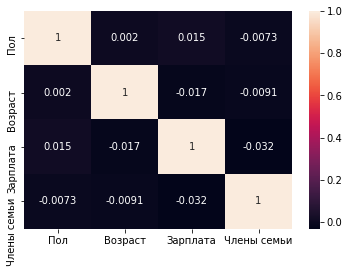

In [15]:
sns.heatmap(features.corr(), annot = True)

Исходя из матрицы корреляции, полученный с помощью коэф. Пирсона, следует что взаимосвязь между признаками очень мала.

    
При изучении вопросо о мультиколлиниарности более подробно все равно возникли недопонимание.
    
Когда признаки линейно зависимы, я поняла почему это плохо: При расчете вектора весов, а именно при умножении $X^TX$ у нас получается, что дискриминант будет равен нулю, так как есть ЛЗ строки, а значит нахождение обратно матрицы ($(X^TX)^{-1}$) будет невозможным.
    
Но случай, когда присутсвует частичная мультиколлинеарность (т.е. признаки не ЛЗ, но сильно коррелирующие), я понимаю не до конца. В интернете нашла следующие проблемы, вызываемые мультиколлиниарностью:
1. Оценки коэффициентов модели (и даже знаки коэффициентов) могут значительно колебаться в зависимости от того, какие другие предикторы включены в модель.
2. Точность оценок коэффициентов снижается, что делает p-значения ненадежными. Это затрудняет определение того, какие переменные-предикторы на самом деле являются статистически значимыми.

Но если честно, все это не понятно и хотелось бы более подробное объяснение. Может есть какое-нибудь хорошее мат. описания возникновения данных проблем?

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

**Ответ:** Нет, не изменится. 
**Обоснование:** 

Проведем требуемую замену

$$
   K = XP \qquad(1.1)
$$


Для дальнейших расчетов понадобятся свойства обратной и транспонированной матрицы


Имеем формулы:
    $$ E = XX^{-1} = X^{-1}X$$
    $$ (XY)^{-1} = Y^{-1} X^{-1} $$
    $$ (XY)^T = Y^T X^T $$
Тогда:
    $$ a = XP(P^TX^TXP)^{-1}P^TX^Ty =$$
    $$ XPP^{-1}(P^TX^TX)^{-1}P^TX^Ty=$$
    $$ XPP^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty =$$
    $$ X(X^TX)^{-1}X^Ty = Xw$$
    
Получается, что значение предсказания $a$ не меняется, если матрицу признаков уможить на какую-либо обратимую матрицу.



Какое соотношение между $w$ и $w_p$?
    
$$
w_P = ((XP)^T XP)^{-1} (XP)^T y = P^{-1} (P^T X^T X)^{-1} P^T X^T y = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y = P^{-1} (X^T X)^{-1} X^T y
$$
    
    
Так как $w = (X^T X)^{-1} X^T y$, то
    
    
$$
w_P = P^{-1} w
$$

Есть ещё один способ доказательства   когда мы берём
    
    
$$
w = \arg\min_w MSE(Xw, y)
$$
    
  
и     
    
$$
w_P = \arg\min_w MSE(XPw_p, y)
$$  
    
    
И делая  замену     $w_P = P^{-1} w$, видим что задача  
    
$$
\arg\min_w MSE(XPw_p, y)
$$
    
сводится к     
  
    
$$
\arg\min_w MSE(XPw_p, y) = \arg\min_w MSE(X P P^{-1} w, y) = \arg\min_w MSE(Xw, y)
$$

## Алгоритм преобразования

Исходя из задания проделанного выше, мы выяснили, что умножив матрицу признаков на какую-либо обратимую матрицу мы не изменим результат предсказания. Отсюда получается, что мы можем построить следующий систему шифрования:

1. В качестве ключа шифрования будет выступать обратимая матрица $P$, значения которой будут иметь нормальное распределение.
2. Функцией шифрования и будет являться умножение матрицы признаков на ключ (обратимую матрицу $P$), т.е. $X_{зашифрованное}=XP$. Злоумышленник перехватив $X_{зашифрованное}$ не сможет получить исходную матрицу признаков $X$, не зная ключа шифрования. В данном случае если мы вдруг хотим из зашифрованной матрицы получить исходную, то нужно лишь умножить $X_{зашифрованное}$ на $P^{-1}$, где $P^{-1}$ это обратная матрица к матрице $P$.

Исходя из данных размышлений получаем следующий алгоритм:

**Алгоритм**
1. Создать матрицу $P$ размерности $(n,n)$, где $n$ - это кол-во признаков. Причем данная матрица должна быть обратимой, а обратные матрицы сеществуют только для квадратных невырожденных матриц (определитель не равен 0).
2. Проверить чему равен определитель матрицы $Р$
3. Умножит исходную матрицу $X$ на $P$.

**Обоснование**
Обосновать это можно исходя из работы проделанной в пункте **Умножение матриц**, но также можно привести следующие рассуждения, что если P - это матрица из случайных чисел, которые имеют нормальное распределение, то при умножении на данную матрицу мы получим иные значения исходной матрицы Х, но при этом их распределения будут совпадать, а значит график предсказаний для линейной регрессии (прямая) будет иметь тот же наклон и то же расположение по оси Оу (ответ), что и график предсказания на исходной матрице Х. Разница будет лишь в том, что значения по оси Ох будут другими.


## Проверка алгоритма

### До преобразования 

In [12]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=RANDOM_STATE)

In [13]:
model_before = LinearRegression()
model_before.fit(features_train, target_train)
results_before = model_before.predict(features_test)
print("Коэф. w:",model_before.coef_)
print('Метрика R2:', r2_score(target_test,results_before))

Коэф. w: [-2.01781615e-03  3.63699909e-02 -9.82822884e-08 -1.24040362e-02]
Метрика R2: 0.4214584788072574


### После преобразования 

Создадим функцию зашифрования матрицы признаков, в которой и будет генерироваться подходящая матрица (ключ). Возвращать данная функция будет уже зашифрованную матрицу признаков.

In [14]:
def matrix_encrypt(features_matrix):
    n = features_matrix.shape[1]
    determ = 0
    while(determ == 0):
        try:
            matrix_key = np.random.normal(size=(n,n))
            linalg.inv(matrix_key)
            determ = linalg.det(matrix_key)
        except linalg.LinAlgError:
            determ = 0
    return features_matrix @ matrix_key

In [15]:
features_enc = matrix_encrypt(features)

Признаки до шифрования

In [16]:
features

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0
...,...,...,...,...
4842,0,28,35700,2
4843,0,34,52400,1
4844,0,20,33900,2
4845,1,22,32700,3


Признаки после шифрования

In [17]:
features_enc

,0,1,2,3
0,-3886.818617,-40426.457499,-25089.231960,-68166.752124
1,-2988.240925,-30960.318386,-19211.299569,-52198.473676
2,-1653.342959,-17106.691688,-10613.443055,-28838.848065
3,-3259.272820,-33998.828346,-21104.851445,-57337.794241
4,-2049.367823,-21267.403605,-13196.630110,-35856.493601
...,...,...,...,...
4842,-2797.722052,-29098.834736,-18061.092811,-49069.471558
4843,-4099.364511,-42716.419450,-26512.757329,-72033.450913
4844,-2652.098985,-27637.008392,-17155.462283,-46607.906368
4845,-2561.479844,-26656.359230,-16547.146195,-44953.719181


In [18]:
features_train, features_test, target_train, target_test = train_test_split(
    features_enc, target, test_size=0.25, random_state=RANDOM_STATE)

In [19]:
model_after = LinearRegression()
model_after.fit(features_train, target_train)
result_after = model_after.predict(features_test)
print("Коэф. w:",model_after.coef_)
print('Метрика R2:', r2_score(target_test,result_after))

Коэф. w: [-0.04099376  0.00835251  0.10505528 -0.04130394]
Метрика R2: 0.42145847880761067


### Итого

In [20]:
print("Коэф. w до преобразования:",model_before.coef_)
print('Метрика R2 до преобразования:', r2_score(target_test,results_before))
print("Коэф. w после преобразования:",model_after.coef_)
print('Метрика R2 после преобразования:', r2_score(target_test,result_after))

Коэф. w до преобразования: [-2.01781615e-03  3.63699909e-02 -9.82822884e-08 -1.24040362e-02]
Метрика R2 до преобразования: 0.4214584788072574
Коэф. w после преобразования: [-0.04099376  0.00835251  0.10505528 -0.04130394]
Метрика R2 после преобразования: 0.42145847880761067


Можем видеть, что наш алгоритм работает верно: признаки передаются в зашифрованном виде, а качество модели при этом остается прежним.


В данной работе требовалось провести защиту данных клиентов. В первую очередь было проведено знакомство с данными, исходя из которого были проведены проверки на корреляцию признаков, наличие пропусков и повторений. Далее стояла задача подобрать такой способ защиты данных, который не изменил бы качество модели и предсказания, но изменил бы данные клиента, чтобы при перехвате этой информации личная информация клиентов осталась не известна. Для этого исходная матрица признаков была умноженна на некоторую обратимую матрицу Р. Данный способ позволил зашифровать матрицу признаков, а при сравнении модель на открытых и зашифрованных данных был получен одинаковый ответ. Отсюда можно сдлелать вывод, что требуемый результат был достигнут.


## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [ ]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные загружены
- [ ]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [ ]  Указан правильный вариант ответа
    - [ ]  Вариант обоснован
- [ ]  Выполнен шаг 3: предложен алгоритм преобразования
    - [ ]  Алгоритм описан
    - [ ]  Алгоритм обоснован
- [ ]  Выполнен шаг 4: алгоритм проверен
    - [ ]  Алгоритм реализован
    - [ ]  Проведено сравнение качества моделей до и после преобразования